___

# <font color= #8A0829> Taller de Modelado de Datos </font>
- <Strong> `Sara Eugenia Rodriguez Reyes` </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Tema: </Strong>  <font color="blue"> `Interpretación de Clusters` </font>
___



Para interpretar los resultados del clustering en datos con muchas dimensiones, se pueden utilizar varias técnicas y herramientas.

El objetivo es entender las características de cada grupo y cómo se diferencian entre ellos.

Esta es una sugerencia de pasos a realizar para la interpretación de clusters:

1. Realizar el clustering (Kmeans/Jerárquico) y asignar grupos a los datos.
2. Interpretar los resultados:
   - Calcular estadísticas descriptivas (media, mediana, etc.) para cada grupo.
   - Visualizar los datos usando técnicas de reducción de dimensionalidad como PCA o t-SNE para entender cómo se distribuyen los clústeres.
   - Crear gráficos para observar las diferencias entre grupos en dimensiones clave.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

### Dataset de Rankings de Universidades

Hay miles de universidades en todo el mundo que admiten nuevos estudiantes cada año. Por lo tanto, los futuros estudiantes generalmente tienen la tarea de investigar las mejores instituciones que se adapten a sus preferencias de aprendizaje antes de presentar su solicitud.

La forma más sencilla suele ser ver cómo se clasifica una universidad de interés a nivel mundial (o en su país de origen) y luego compararla con otra universidad. 

Un enfoque más detallado sería comparar las universidades no sólo por sus clasificaciones sino también por métricas como el entorno de investigación, los estándares de enseñanza, la hospitalidad hacia los estudiantes extranjeros y los ingresos de la industria, entre otros.

Con ese fin, este conjunto de datos proporciona una lista de universidades junto con sus clasificaciones y otras métricas de interés según el Times Higher Education.


In [2]:
data = pd.read_csv('world_university_rankings_2016.csv', index_col='university_name')
X = data[['teaching', 'international', 'research', 
       'citations', 'income', 'num_students', 'student_staff_ratio', 
       'international%', 'female%','male%']]
X.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,
California Institute of Technology,95.6,64.0,97.6,99.8,97.8,2243.0,6.9,27.0,33.0,67.0
University of Oxford,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34.0,46.0,54.0
Stanford University,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,88.2,91.5,96.7,97.0,55.0,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,89.4,84.0,88.6,99.7,95.4,11074.0,9.0,33.0,37.0,63.0


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, California Institute of Technology to Yuan Ze University
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   teaching             800 non-null    float64
 1   international        800 non-null    float64
 2   research             800 non-null    float64
 3   citations            800 non-null    float64
 4   income               763 non-null    float64
 5   num_students         793 non-null    float64
 6   student_staff_ratio  793 non-null    float64
 7   international%       790 non-null    float64
 8   female%              736 non-null    float64
 9   male%                736 non-null    float64
dtypes: float64(10)
memory usage: 68.8+ KB


In [4]:
#rellenamos los nulos con la media
X = X.fillna(X.mean()) 

<Axes: ylabel='Density'>

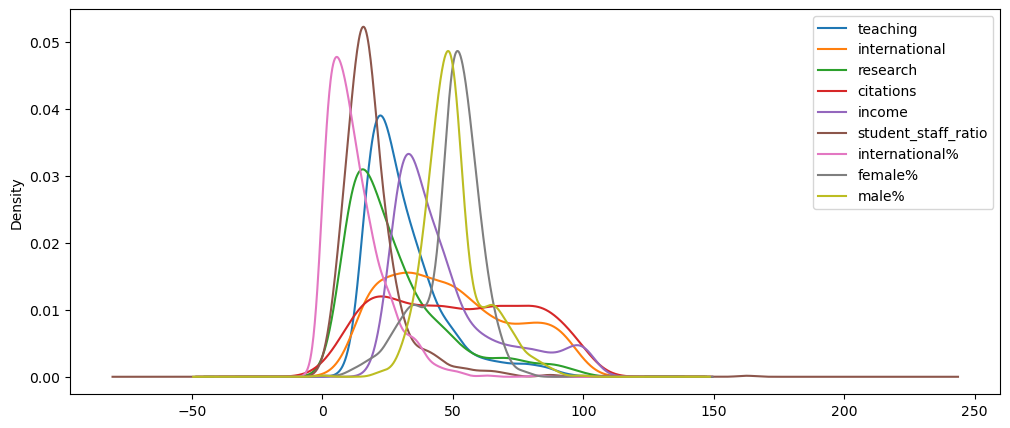

In [5]:
#Graficamos los datos para observar su distribucion
X1 = pd.DataFrame(X,columns=X.columns)
X1.drop('num_students', axis=1,inplace=True)
X1.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

In [6]:
#los datos están en diferentes escala por lo tanto los estandarizamos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 4.27456366,  0.65465542,  3.55897378, ...,  1.34850955,
        -1.44235777,  1.44235777],
       [ 3.66692605,  1.93865583,  3.62557194, ...,  2.008736  ,
        -0.30856882,  0.30856882],
       [ 4.06756624,  1.17416874,  3.48725268, ...,  0.87691922,
        -0.65742695,  0.65742695],
       ...,
       [-0.50640919, -1.36848995, -0.91847191, ..., -0.91512401,
         0.        ,  0.        ],
       [-0.76682531, -1.0643846 , -0.62134164, ..., -0.44353369,
        -1.87843044,  1.87843044],
       [-1.02724143, -1.30091099, -0.50351413, ..., -0.82080595,
        -0.57021242,  0.57021242]])

<Axes: ylabel='Density'>

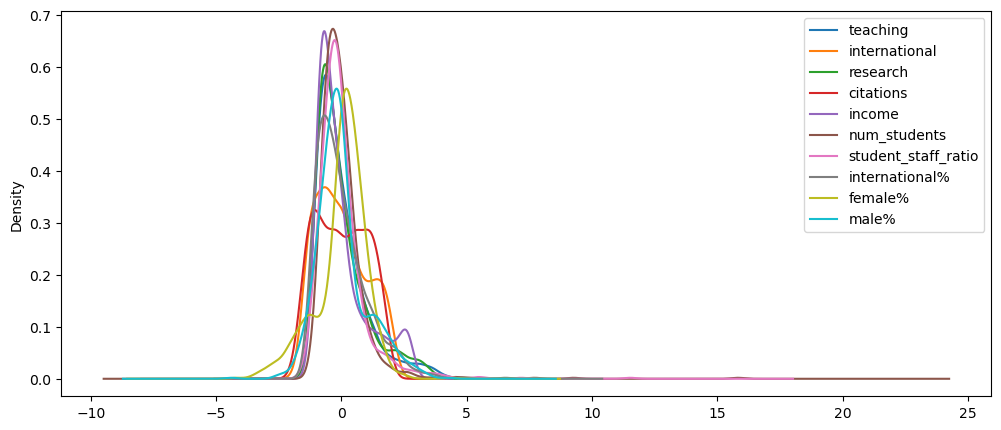

In [7]:
##Graficamos los datos para observar su distribucion
pd.DataFrame(X_scaled,columns=X.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

### Kmeans

Supongamos que por conocimientod de negocio queremos dividir los datos en 3 grupos. 

In [8]:
kmeans = KMeans(init='random', n_clusters=3, n_init=10)
kmeans.fit(X_scaled)
clusters =  kmeans.predict(X_scaled)

C:\Users\Saruki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [9]:
#agregamos la columna del cluster a cada dato
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%,cluster
university_name,,,,,,,,,,,
California Institute of Technology,4.274564,0.654655,3.558974,1.794039,2.536181,-0.976050,-0.980509,1.348510,-1.442358,1.442358,1
University of Oxford,3.666926,1.938656,3.625572,1.757041,1.306195,-0.188914,-0.603279,2.008736,-0.308569,0.308569,1
Stanford University,4.067566,1.174169,3.487253,1.797739,0.818185,-0.381423,-0.908273,0.876919,-0.657427,0.657427,1
University of Cambridge,3.780441,1.816169,3.512867,1.690445,0.404870,-0.238210,-0.587226,2.008736,-0.308569,0.308569,1
Massachusetts Institute of Technology,3.860569,1.499393,3.097910,1.790340,2.416668,-0.582793,-0.811959,1.914418,-1.093500,1.093500,1


### Estadisticas descriptivas

Calculamos estadisticas descriptivas por cluster para comenzar a ver patrones en los datos

In [10]:
#promedios por cluster
X_clustered = pd.DataFrame(X, columns=X.columns, index=X.index)
X_clustered['cluster'] = clusters
cluster_summary = X_clustered.groupby('cluster').mean()
print("\nPromedio de las características por clúster:")
print(cluster_summary)


Promedio de las características por clúster:
          teaching  international   research  citations     income  \
cluster                                                              
0        27.675817      29.147059  22.628758  33.287582  57.253197   
1        46.464807      70.223605  49.477253  78.189270  55.184457   
2        24.653382      43.426812  18.146135  42.842271  38.352554   

         num_students  student_staff_ratio  international%    female%  \
cluster                                                                 
0        17715.609574            16.582460        6.886945  32.082943   
1        22835.020577            17.844846       22.024936  51.064004   
2        27289.767619            20.768476        9.605103  55.130028   

             male%  
cluster             
0        67.917057  
1        48.935996  
2        44.869972  


### Reducir la dimensionalidad (PCA)
Al tener demasiadas varibles es un poco difícil la visualizacion, una opción es aplicar el PCA para reducir la dimensionalidad de los datos a un formato de 2D.

In [11]:
# reducimos la dimensionalidad para una mejor visualización (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)

In [12]:
# convertimos a dataframe
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,cluster
university_name,,,
California Institute of Technology,5.555064,-3.811757,1
University of Oxford,5.977205,-1.462953,1
Stanford University,5.231170,-2.141250,1
University of Cambridge,5.735713,-1.242813,1
Massachusetts Institute of Technology,5.721362,-2.896713,1


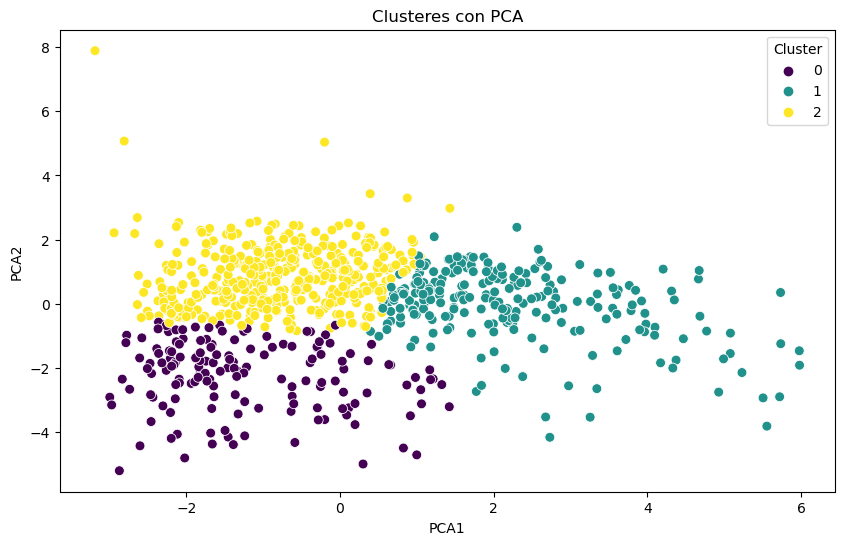

In [13]:
# Visualizar los clusters en 2D utilizando el PCA
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_reduceddf, x='PC1', y='PC2', hue='cluster', palette='viridis', s=50)
plt.title('Clusteres con PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

### Identificar características más relevantes

Con el PCA es más fácil observar patrones en los datos... 

Pero, ¿qué representan realmente estos grupos?

El clustering no nos ha dado mucha pista de qué son estos 3 grupos. Desafortunadamente, aquí no existe un enfoque mágico... Necesitamos examinar los grupos y determinar una forma sensata de interpretarlos. Esto se reduce a resumir las muestras dentro de cada grupo o caracterizar los grupos. Afortunadamente, podemos utilizar algunas herramientas que nos ayuden.

### Gráfico de coordinadas paralelas

Podemos utilizar un gráfico de coordenadas paralelas para ver cómo se ubican los puntos de datos individuales en todas nuestras variables. 

Cada color representa un grupo diferente. Al observar cómo se comparan los valores de las variables entre los grupos, podemos tener una idea de lo que realmente representan los grupos.


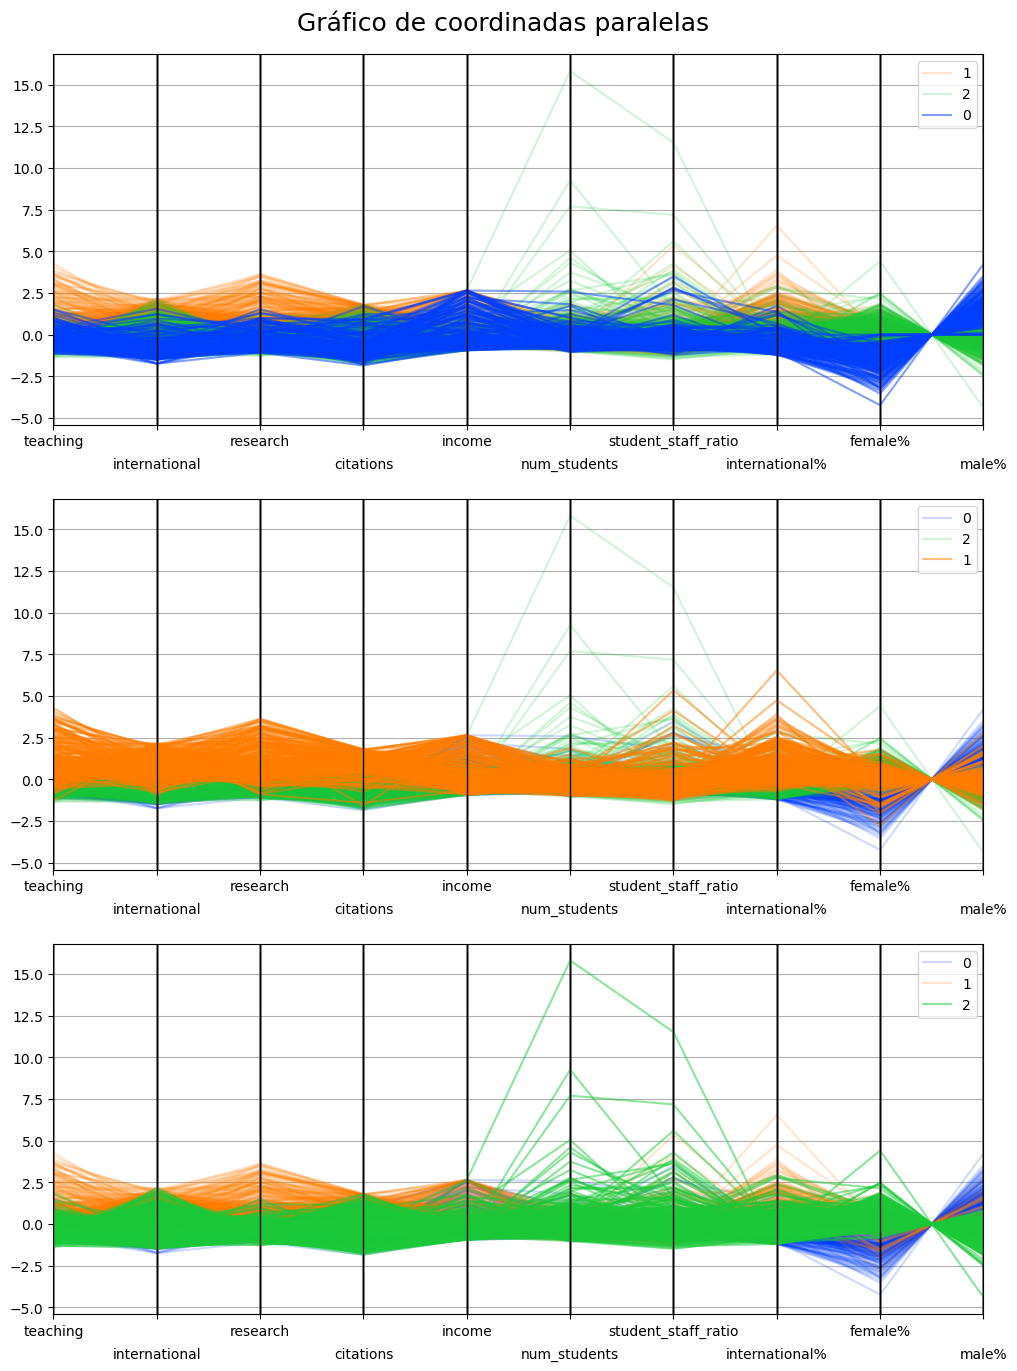

In [14]:
from pandas.plotting import parallel_coordinates

palette = sns.color_palette("bright", 10)

def addAlpha(colour, alpha):    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Gráfico de coordinadas paralelas", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20) 


X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns[0:10])
X_clustered["cluster"] = clusters
display_parallel_coordinates(X_clustered, 3)

Muestras naranjas (cluster 1) con alto ranking en docencia e investigación y un elevado número de estudiantes internacionales.

Muestras azules (grupo 0) con una alta proporción de hombres y altos ingresos.

Muestras verdes (grupo 2), algunas de las cuales tienen un alto número de estudiantes y una alta proporción de estudiantes por personal, pero los ingresos parecen ser bajos.

### Centroides

Los centroides (promedios de cada grupo) tambien nos pueden dar más información

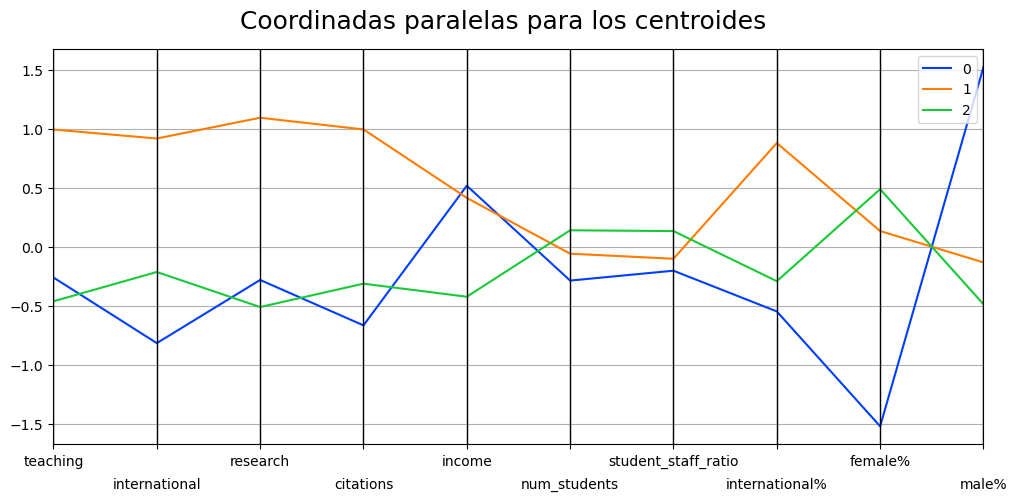

In [15]:
def display_parallel_coordinates_centroids(df, num_clusters):

    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Coordinadas paralelas para los centroides", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    parallel_coordinates(df, 'cluster', color=palette)

    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)  

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns[0:10])
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)